In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from AST425 import *

In [2]:
#shape of VAE is 38, 100, 100, 2, 100, 100 38

In [3]:
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['legend.fontsize'] = 13

In [4]:
data = pd.read_csv('../tsne_umap_tutorials/data/APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

# data = pd.read_csv('APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

In [5]:
# Spatial:
ra = data["RA"]   #APOGEE
dec = data["DEC"]   #APOGEE

# Identification:
apogee_ID = data["# APOGEE_ID_"]   #APOGEE
gaia_ID = data["GAIAEDR3_SOURCE_ID"]  # Gaia

# Kinematic:
parallax = data["GAIAEDR3_PARALLAX"]  # Gaia
pmra = data["GAIAEDR3_PMRA"]  # Gaia
pmra_err = data["GAIAEDR3_PMRA_ERROR"]  # Gaia
pmdec = data["GAIAEDR3_PMDEC"]  # Gaia
pmdec_err = data["GAIAEDR3_PMDEC_ERROR"]  # Gaia
RV = data["VHELIO_AVG"]   #APOGEE
RV_err = data["VERR"]   #APOGEE
#dist = data["dist"]   #APOGEE no dist in this dataset?
#dist_err = data["dist_err"]   #APOGEE
jr = data["jr"]   #APOGEE
jr_err = data["jr_err"]   #APOGEE
jz = data["jz"]   #APOGEE
jz_err = data["jz_err"]   #APOGEE
#jphi = data["jphi"]   #APOGEE no jphi in this dataset?
#jphi_err = data["jphi_err"]    #APOGEE

# # Spectral (useful for filtering):
TEFF_ERR = data["TEFF_ERR"]   #APOGEE
TEFF = data["TEFF"]   #APOGEE
LOGG_ERR = data["LOGG_ERR"]   #APOGEE
LOGG = data["LOGG"]   #APOGEE
SNR = data["SNR"]   #APOGEE
ASPCAPFLAG = data["ASPCAPFLAG"]
STARFLAG = data["STARFLAG"]

# # Chemical abundances from astroNN:
FE_H = data['FE_H'] 
C_FE = data['C_FE']
CI_FE = data['CI_FE']
N_FE = data['N_FE']
O_FE = data['O_FE']
MG_FE = data['MG_FE']
AL_FE = data['AL_FE']
SI_FE = data['SI_FE']
P_FE = data['P_FE']
S_FE = data['S_FE']
K_FE = data['K_FE']
CA_FE = data['CA_FE']
TI_FE = data['TI_FE']
TIII_FE = data['TIII_FE']
V_FE = data['V_FE']
CR_FE = data['CR_FE']
MN_FE = data['MN_FE']
CO_FE = data['CO_FE']
NI_FE = data['NI_FE']

# # Chemical abundance errors from astroNN:
FE_H_err = data["FE_H_ERR"] 
C_FE_err = data['C_FE_ERR']
CI_FE_err = data['CI_FE_ERR']
N_FE_err = data['N_FE_ERR']
O_FE_err = data['O_FE_ERR']
MG_FE_err = data['MG_FE_ERR']
AL_FE_err = data['AL_FE_ERR']
SI_FE_err = data['SI_FE_ERR']
P_FE_err = data['P_FE_ERR']
S_FE_err = data['S_FE_ERR']
K_FE_err = data['K_FE_ERR']
CA_FE_err = data['CA_FE_ERR']
TI_FE_err = data['TI_FE_ERR']
TIII_FE_err = data['TIII_FE_ERR']
V_FE_err = data['V_FE_ERR']
CR_FE_err = data['CR_FE_ERR']
MN_FE_err = data['MN_FE_ERR']
CO_FE_err = data['CO_FE_ERR']
NI_FE_err = data['NI_FE_ERR']

# # Number of stars in the initial sample of APOGEE DR16: 
print("There are {} stars in our initial sample".format(len(ra)))

cols = [ra, dec, apogee_ID, gaia_ID, parallax, pmra, pmra_err, pmdec, pmdec_err, RV, RV_err, #dist, dist_err,
         jr, jr_err,# jphi, jphi_err,
        jz, jz_err, TEFF, TEFF_ERR, LOGG, LOGG_ERR, SNR, ASPCAPFLAG, STARFLAG, FE_H, FE_H_err, C_FE, 
         C_FE_err, CI_FE, CI_FE_err, N_FE, N_FE_err, O_FE, O_FE_err, MG_FE, MG_FE_err, AL_FE, AL_FE_err, SI_FE,
         SI_FE_err, P_FE, P_FE_err, S_FE, S_FE_err, K_FE, K_FE_err, CA_FE, CA_FE_err, TI_FE, TI_FE_err, TIII_FE,
         TIII_FE_err, V_FE, V_FE_err, CR_FE, CR_FE_err, MN_FE, MN_FE_err, CO_FE, CO_FE_err, NI_FE, NI_FE_err]

There are 370060 stars in our initial sample


In [6]:
aspcapflags_filter = np.array(cols[20])==0
starflags_filter = np.array(cols[21])==0

filters = aspcapflags_filter*starflags_filter


filtered_data = []
for c in cols:
    a = np.array(c)[filters]
    filtered_data.append(a)
    
print("There are {} stars in our filtered sample".format(len(filtered_data[0])))

There are 144767 stars in our filtered sample


In [7]:
FE_H_filtered, C_FE_filtered, CI_FE_filtered = filtered_data[22], filtered_data[24], filtered_data[26]
N_FE_filtered, O_FE_filtered, MG_FE_filtered = filtered_data[28], filtered_data[30], filtered_data[32]
AL_FE_filtered, SI_FE_filtered, P_FE_filtered = filtered_data[34], filtered_data[36], filtered_data[38]
S_FE_filtered, K_FE_filtered, CA_FE_filtered = filtered_data[40], filtered_data[42], filtered_data[44]
TI_FE_filtered, TIII_FE_filtered, V_FE_filtered = filtered_data[46], filtered_data[48], filtered_data[50]
CR_FE_filtered, MN_FE_filtered, CO_FE_filtered, NI_FE_filtered = filtered_data[52], filtered_data[54], filtered_data[56], filtered_data[58]
RV_filtered  = filtered_data[9]

In [8]:
FE_H_err, C_FE_err, CI_FE_err = filtered_data[23], filtered_data[25], filtered_data[27]
N_FE_err, O_FE_err, MG_FE_err = filtered_data[29], filtered_data[31], filtered_data[33]
AL_FE_err, SI_FE_err, P_FE_err = filtered_data[35], filtered_data[37], filtered_data[39]
S_FE_err, K_FE_err, CA_FE_err = filtered_data[41], filtered_data[43], filtered_data[45]
TI_FE_err, TIII_FE_err, V_FE_err = filtered_data[47], filtered_data[49], filtered_data[51]
CR_FE_err, MN_FE_err, CO_FE_err, NI_FE_err = filtered_data[53], filtered_data[55], filtered_data[57], filtered_data[59]
RV_err  = filtered_data[10]

In [9]:
training_labels = np.transpose(np.array([FE_H_filtered[:115000], C_FE_filtered[:115000], CI_FE_filtered[:115000], 
                                        N_FE_filtered[:115000], O_FE_filtered[:115000], MG_FE_filtered[:115000],
                                        AL_FE_filtered[:115000], SI_FE_filtered[:115000], P_FE_filtered[:115000],
                                        S_FE_filtered[:115000], K_FE_filtered[:115000], CA_FE_filtered[:115000],
                                        TI_FE_filtered[:115000], TIII_FE_filtered[:115000], V_FE_filtered[:115000], 
                                        CR_FE_filtered[:115000], MN_FE_filtered[:115000], CO_FE_filtered[:115000], NI_FE_filtered[:115000]]))

error_training_labels = np.transpose(np.array([FE_H_err[:115000], C_FE_err[:115000], CI_FE_err[:115000], 
                                        N_FE_err[:115000], O_FE_err[:115000], MG_FE_err[:115000],
                                        AL_FE_err[:115000], SI_FE_err[:115000], P_FE_err[:115000],
                                        S_FE_err[:115000], K_FE_err[:115000], CA_FE_err[:115000],
                                        TI_FE_err[:115000], TIII_FE_err[:115000], V_FE_err[:115000], 
                                        CR_FE_err[:115000], MN_FE_err[:115000], CO_FE_err[:115000], NI_FE_err[:115000]]))


test_labels = np.transpose(np.array([FE_H_filtered[115000:], C_FE_filtered[115000:], CI_FE_filtered[115000:], 
                                        N_FE_filtered[115000:], O_FE_filtered[115000:], MG_FE_filtered[115000:],
                                        AL_FE_filtered[115000:], SI_FE_filtered[115000:], P_FE_filtered[115000:],
                                        S_FE_filtered[115000:], K_FE_filtered[115000:], CA_FE_filtered[115000:],
                                        TI_FE_filtered[115000:], TIII_FE_filtered[115000:], V_FE_filtered[115000:], 
                                        CR_FE_filtered[115000:], MN_FE_filtered[115000:], CO_FE_filtered[115000:], NI_FE_filtered[115000:]]))
                                     
                                     
error_test_labels = np.transpose(np.array([FE_H_err[115000:], C_FE_err[115000:], CI_FE_err[115000:], 
                                        N_FE_err[115000:], O_FE_err[115000:], MG_FE_err[115000:],
                                        AL_FE_err[115000:], SI_FE_err[115000:], P_FE_err[115000:],
                                        S_FE_err[115000:], K_FE_err[115000:], CA_FE_err[115000:],
                                        TI_FE_err[115000:], TIII_FE_err[115000:], V_FE_err[115000:], 
                                        CR_FE_err[115000:], MN_FE_err[115000:], CO_FE_err[115000:], NI_FE_err[115000:]]))

In [10]:
full_training_labels = np.c_[training_labels, error_training_labels]
full_test_labels = np.c_[test_labels, error_test_labels]

In [11]:
full_training_labels.shape

(115000, 38)

# SAMPLING LAYER

In [12]:
class Sampling(layers.Layer):
    """Uses (mean, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# ENCODER

In [13]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(19,)) #to predict error, inputs is 38

x = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs)
x = tf.keras.layers.Dense(100, activation='gelu')(x)
x = tf.keras.layers.Dense(100, activation='gelu')(x)

mean = layers.Dense(latent_dim, name="mean")(x)
log_var = layers.Dense(latent_dim, name="log_var")(x)
z = Sampling()([mean, log_var])
encoder = keras.Model(encoder_inputs, [mean, log_var, z], name="encoder")
#encoder.summary()

In [14]:
#Structure of old NN:
#     tf.keras.layers.Dense(100, activation='gelu'),
#     tf.keras.layers.Dense(100, activation='gelu'),
#     tf.keras.layers.Dense(100, activation='linear'),
#     tf.keras.layers.Dense(38)

# DECODER

In [15]:
latent_inputs = keras.Input(shape=(latent_dim,))


x = layers.Dense(100, activation="gelu")(latent_inputs)
x = layers.Dense(100, activation="gelu")(x)
x = layers.Dense(100, activation="gelu")(x)

decoder_outputs = layers.Dense(19, activation="linear")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
#decoder.summary()

# DEFINE VAE

In [16]:
alpha=1e-7
optimizer = tf.keras.optimizers.Adam(learning_rate = alpha)
 
def mse_loss(y_true, y_pred):
    r_loss = K.mean(K.square(y_true - y_pred), axis = [1,2,3])
    return 1000 * r_loss
 
def kl_loss(mean, log_var):
    kl_loss =  -0.5 * K.sum(1 + log_var - K.square(mean) - K.exp(log_var), axis = 1)
    return kl_loss
 
def vae_loss(y_true, y_pred, mean, var):
    r_loss = mse_loss(y_true, y_pred)
    kl_loss = kl_loss(mean, log_var)
    return  r_loss + kl_loss

In [17]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss") 
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.MSE(data, reconstruction) #for custom loss, average over 1 axis, change to custom loss here
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# TRAIN

In [18]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(training_labels, epochs=100, batch_size=256)

Epoch 1/100
450/450 [==============================] - 5s 8ms/step - loss: 3.4424 - reconstruction_loss: 2.1025 - kl_loss: 0.7818
Epoch 2/100
450/450 [==============================] - 3s 6ms/step - loss: 2.6180 - reconstruction_loss: 1.7139 - kl_loss: 0.8949
Epoch 3/100
450/450 [==============================] - 3s 6ms/step - loss: 2.5847 - reconstruction_loss: 1.6642 - kl_loss: 0.9093
Epoch 4/100
450/450 [==============================] - 3s 6ms/step - loss: 2.5704 - reconstruction_loss: 1.6416 - kl_loss: 0.9266
Epoch 5/100
450/450 [==============================] - 3s 6ms/step - loss: 2.5619 - reconstruction_loss: 1.6202 - kl_loss: 0.9327
Epoch 6/100
450/450 [==============================] - 3s 6ms/step - loss: 2.5486 - reconstruction_loss: 1.6047 - kl_loss: 0.9432
Epoch 7/100
450/450 [==============================] - 3s 6ms/step - loss: 2.5503 - reconstruction_loss: 1.5974 - kl_loss: 0.9474
Epoch 8/100
450/450 [==============================] - 3s 6ms/step - loss: 2.5374 - recons

In [19]:
testmean, testvar, testz = encoder(test_labels)

In [20]:
test_reconstruction = decoder(testz)

In [21]:
test_labels, test_reconstruction

(array([[ 0.16089709, -0.0462888 , -0.13949211, ...,  0.07128452,
          0.09965296,  0.0346521 ],
        [-0.2159388 , -0.01849935, -0.0909799 , ..., -0.03383976,
         -0.06942701,  0.04044768],
        [-0.2329385 , -0.01623659, -0.05243784, ...,  0.00626814,
          0.08218223,  0.02543068],
        ...,
        [-0.05302382, -0.10000517, -0.13376433, ...,  0.05390429,
          0.08138487, -0.01325735],
        [-0.42941615, -0.07686421, -0.06466031, ..., -0.05078754,
          0.03391901,  0.02152377],
        [-0.12155101, -0.09844092, -0.12906697, ..., -0.01498961,
          0.04971881, -0.00622702]]),
 <tf.Tensor: shape=(29767, 19), dtype=float32, numpy=
 array([[ 0.20551918, -0.00550935, -0.07969181, ...,  0.09594844,
          0.09821654,  0.03438457],
        [-0.33154774, -0.02792719, -0.04939906, ..., -0.04154025,
          0.02040368,  0.02687084],
        [-0.28089443, -0.04980805, -0.07857245, ..., -0.0301958 ,
          0.01167687,  0.01923793],
        ...,


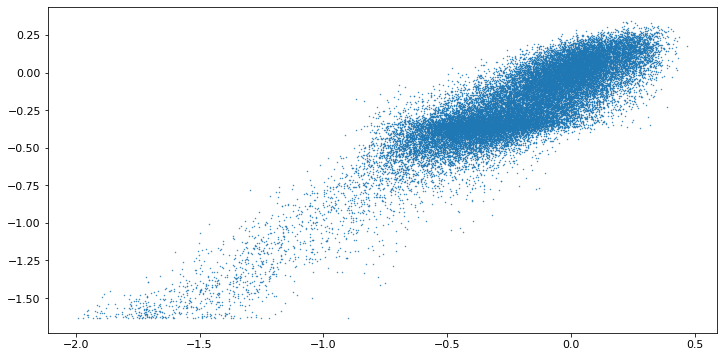

In [22]:
# mses = (test_reconstruction - test_labels)[:,0]

plt.figure(figsize = (12, 6))
plt.scatter(test_labels[:,0], test_reconstruction[:,0], s=0.2)
# plt.ylim(bottom=0., top=0.1)

(Text(0.5, 0, 'Original'), Text(0, 0.5, 'Reconstructed'))

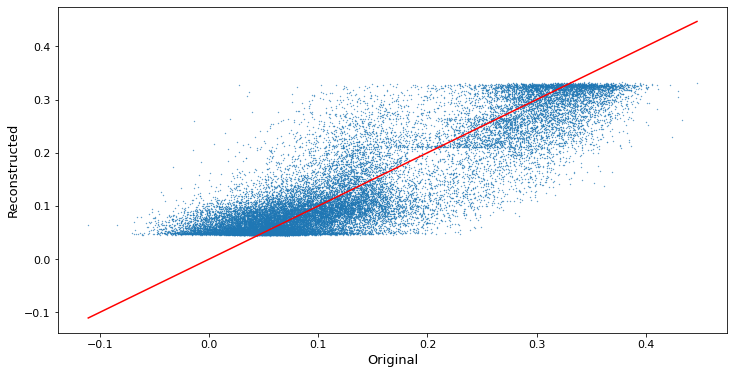

In [23]:
ind = 5  # 19 parameters, 0 to 18
samp_rate = 1

plt.figure(figsize = (12, 6))
plt.scatter(test_labels[:,ind][::samp_rate], test_reconstruction[:,ind][::samp_rate], s=0.1)#, xerr=np.exp(test_labels[:,ind+19][::samp_rate]/2), yerr=np.exp(test_reconstruction[:,ind+19][::samp_rate]/2), fmt='.', markersize=5, elinewidth=0.5)
# plt.plot(np.linspace(0., 0.3, int(1e4)), np.linspace(0., 0.3, int(1e4)), c='r')
plt.plot(np.linspace(np.min(test_labels[:,ind]), np.max(test_labels[:,ind]), int(1e5)), np.linspace(np.min(test_labels[:,ind]), np.max(test_labels[:,ind]), int(1e5)), c='r')
plt.xlabel('Original'), plt.ylabel('Reconstructed')
# plt.xlim(-0.5, 0.4)
# plt.ylim(-0.5, 0.4)

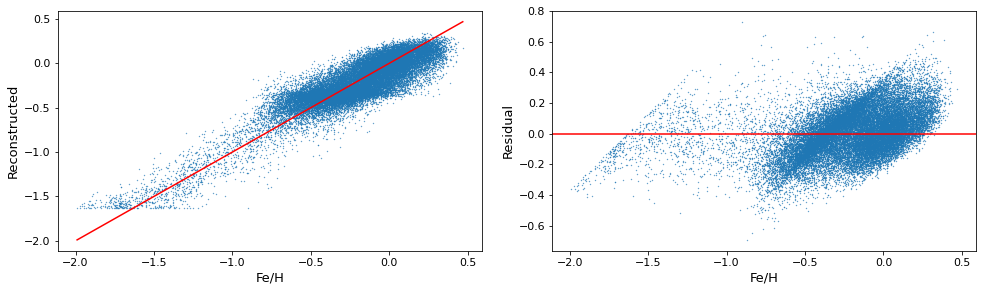

In [127]:
import matplotlib as mpl
plt.rc('font', size=18)

ind=0

fig = plt.figure(figsize = (14, 8))
# ax = fig.add_subplot(111)    # The big subplot
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
# ax2 = fig.add_subplot(223)
# ax3 = fig.add_subplot(224)
# plot the metallicity
ax0.scatter(test_labels[:,ind], test_reconstruction[:,ind], s=0.1)
ax0.plot(np.linspace(np.min(test_labels[:,ind]), np.max(test_labels[:,ind]), int(1e5)), np.linspace(np.min(test_labels[:,ind]), np.max(test_labels[:,ind]), int(1e5)), c='r')
ax0.set_xlabel('Fe/H'), ax0.set_ylabel('Reconstructed')
# plot the residuals of metallicity
# ax1.hist2d(test_labels[:,ind], test_labels[:,ind] - test_reconstruction[:,ind], norm=mpl.colors.LogNorm(), bins=200)
ax1.scatter(test_labels[:,ind], test_labels[:,ind] - test_reconstruction[:,ind], s=0.1)
ax1.set_xlabel(r'Fe/H'), ax1.set_ylabel('Residual')
# ax1.scatter(test_labels[:,ind], test_labels[:,ind] - test_reconstruction[:,ind], s=0.1)
ax1.axhline(0, c='r')
plt.tight_layout()
plt.savefig('metallicity_original_vs_reconstructed_naive.png')

In [128]:
np.std(test_labels[:,ind] - test_reconstruction[:,ind])

0.15158997

Plot:

<ipython-input-99-8b57296e1b5d>:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('original_vs_reconstructed_naive_all.png', fmt='png')


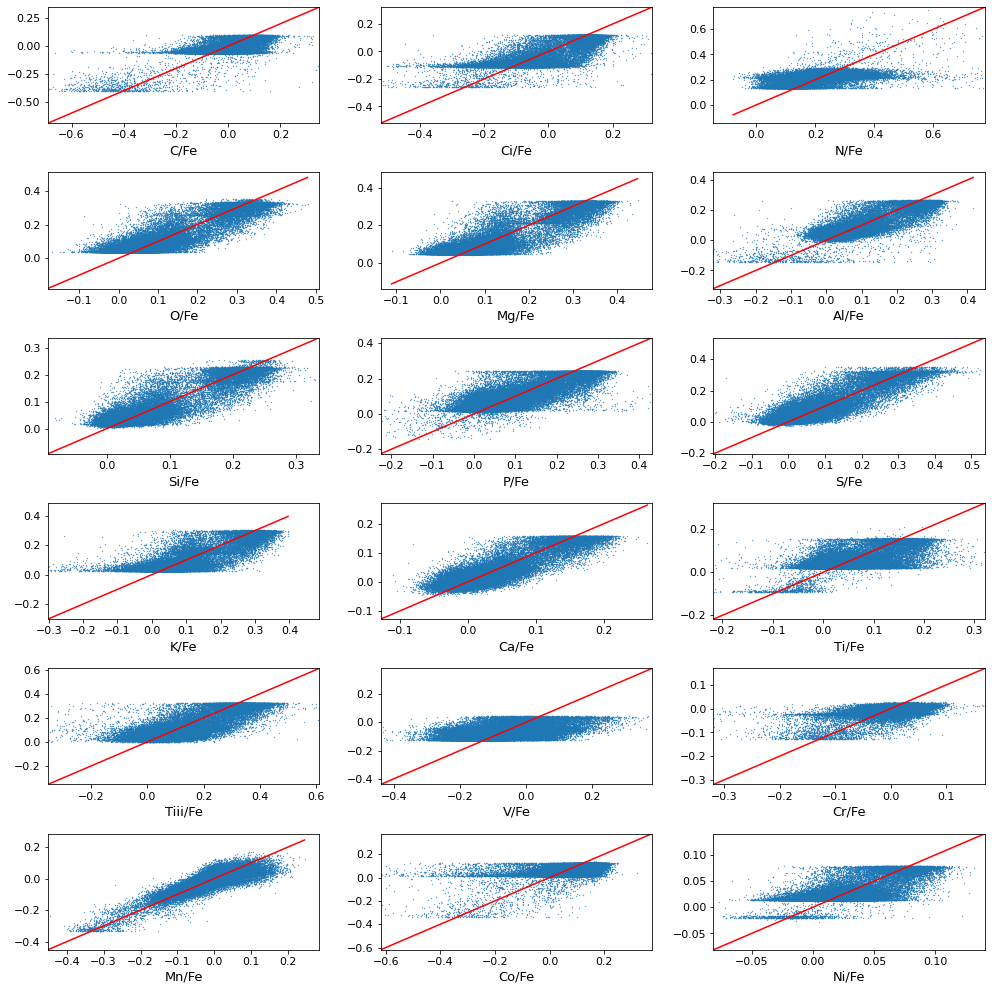

In [99]:
abundances = ['Fe/H', 'C/Fe', 'Ci/Fe', 'N/Fe', 'O/Fe', 'Mg/Fe', 'Al/Fe', 'Si/Fe', 'P/Fe', 'S/Fe', 'K/Fe', 'Ca/Fe', 'Ti/Fe', 'Tiii/Fe', 'V/Fe', 'Cr/Fe', 'Mn/Fe', 'Co/Fe', 'Ni/Fe']
divisor = 4  # fraction of the range to scale the plots by

plt.rc('font', size=14)
fig, ax = plt.subplots(6, 3, figsize=(14, 14))
for i in range(6):
    for j in range(3):
        ax[i, j].scatter(test_labels[:,3*i+j+1][::samp_rate], test_reconstruction[:,3*i+j+1][::samp_rate], s=0.1)
        # plt.plot(np.linspace(0., 0.3, int(1e4)), np.linspace(0., 0.3, int(1e4)), c='r')
        ax[i, j].plot(np.linspace(np.min(test_labels[:,3*i+j+1]), np.max(test_labels[:,3*i+j+1]), int(1e5)), 
                      np.linspace(np.min(test_labels[:,3*i+j+1]), np.max(test_labels[:,3*i+j+1]), int(1e5)), c='r')
        ax[i, j].set_xlabel(abundances[3*i+j+1])# , ax[i, j].set_ylabel('Reconstructed')       
        # scale it properly based on reconstruction
        abundance_min, abundance_max = np.quantile(test_labels[:,3*i+j+1], (0.005, 0.995))
        # abundance_min = np.min(test_reconstruction[:, 3*i + j])
        # abundance_max = np.max(test_reconstruction[:, 3*i + j])
        diff = np.abs(abundance_max - abundance_min)
        # scale it
        ax[i, j].set_xlim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        ax[i, j].set_ylim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        
plt.tight_layout()
plt.savefig('original_vs_reconstructed_naive_all.png', fmt='png')
plt.show()

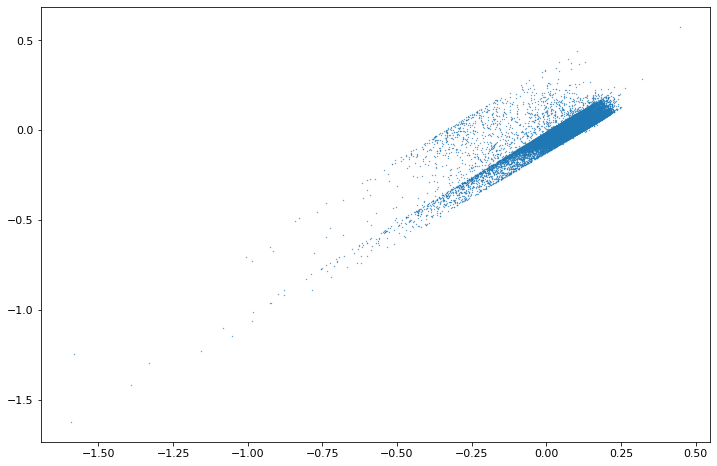

In [124]:
plt.scatter(test_labels[:,17], (test_labels[:,17] - test_reconstruction[:, 17]), s=0.1)